# In class exercise...
* MI is biased in that small sample sizes lead to inaccurate estimates of PDFs, and that can sometimes lead to negative MI values (which should never happen in theory). 
* A common, and simple, approach, is to compute MI with shuffled condition labels (like randomization tests that we did many weeks back) and then subtract the shuffled MI from the actual MI. 

## Imports

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
import sys
epsilon = sys.float_info.epsilon
# also define the default font we'll use for figures. 
fig_font = {'fontname':'Arial', 'size':'20'}

## First set up two arrays of data...make them correlated to some degree so that there is a reasonably high MI...

In [23]:
N=100
x = np.arange(N)
y = x+np.random.rand(N)
print(x)
print(y)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]
[ 0.6102875   1.4428832   2.56669153  3.87376427  4.13863264  5.17660569
  6.88041769  7.5184807   8.56319497  9.88971085 10.32586912 11.7982105
 12.43468554 13.69990678 14.85570343 15.2605782  16.72368636 17.15431061
 18.18266068 19.69450046 20.66694707 21.73904515 22.69494969 23.3226199
 24.69812509 25.99900824 26.37183662 27.55383491 28.49266345 29.10925356
 30.46019701 31.29703426 32.37751334 33.20437626 34.49754731 35.21546332
 36.30404363 37.86686746 38.09235533 39.75594366 40.06719616 41.40401465
 42.00811536 43.15400284 44.35581202 45.55180749 46.70050937 47.53308083
 48.81546328 49.97919319 50.76328282 51.83004545 52.12524591 53.21055394
 54.51673535 55.17593284 56.42137386 57

In [24]:
def entropy(x):
    
    # figure out unique values of x - can be more than just 0s, 1s
    uniquex = np.unique(x)

    Hx = 0
    for i in np.arange(len(uniquex)):
        # probability that x==uniquex[i]
        px = np.sum(x==uniquex[i])/len(x)    

        # check for px==0 because log2(0) = -inf
        if px!=0:
            Hx += (-np.sum( px * np.log2(px+epsilon) ))  
        else:
            print('px is zero for value ', i)
        
    return Hx

In [25]:
def condEntropy(x,y):
    
    Hxy=0
    uniquex = np.unique(x)
    uniquey = np.unique(y)

    # loop over unique elements of y
    for i in np.arange(len(uniquey)): 

        # probability that y==y(i) (prob of each y)
        py = np.sum(y==uniquey[i]) / N

        # then loop over all possible x's to compute entropy of x at each y
        tmp=0
        for j in np.arange(len(uniquex)):
            px_y = np.sum((x==uniquex[j]) & (y==uniquey[i])) / np.sum(y==uniquey[i])    # e.g. prob x==1 when y==0
            tmp += (-( px_y * np.log2(px_y+epsilon) ))                                     # entropy      

        # then tally up entropy of x given each specific y multiplied by the probability of that y (py)
        Hxy += py*tmp

    return Hxy

## Then compute the MI between the arrays. Can do two discrete arrays for simplicity, and import the entropy and conditional entropy functions from the tutorial.

In [26]:
Hx = entropy(x=x)
Hxy = condEntropy(x=x,y=y)
print('MI is: ', Hx-Hxy)

MI is:  6.643856189774683


## Now repeat the above operations, but shuffle the data arrays and repeat the analysis many times (~500-1000 times). Plot the distribution of MI values that you get.

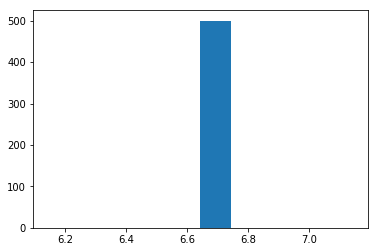

In [28]:
num_shuffle = 500
tmp0 = np.zeros(N)
tmp1 = np.zeros(N)
Hx = np.zeros(num_shuffle)
Hxy = np.zeros(num_shuffle)
MI = np.zeros(num_shuffle)

for i in np.arange(num_shuffle):
    for j in np.arange(N):   
        if np.random.rand(1) < .5:
            tmp0[j] = x[j]
            tmp1[j] = y[j]
        else:
            tmp0[j] = y[j]
            tmp1[j] = x[j]
    Hx[i] = entropy(x=tmp0)
    Hxy[i] = condEntropy(x=tmp0,y=tmp1)
    MI[i] = Hx[i] - Hxy[i]

#MI = Hx - Hxy

plt.hist(MI)
plt.show()

## Now subtract the mean of the shuffled MI values from your 'real' MI value...this will help correct for any bias that is introduced by a limited sample size

In [ ]:
MIt-np.mean(MI)